In [199]:
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
# Suggest protein levels (g/lb) for Body Fat % on a sliding scale between 1.2 and 1.6 (clamped between 10% BF and 25% BF)
def get_target_protein_intake(row):
    if row['Body Fat %'] <= 10:
        return 1.6 * row["LBM"]
    elif row['Body Fat %'] < 15:
        return (1.6 - (row['Body Fat %'] - 5) * 0.05) * row["LBM"]
    elif row['Body Fat %'] < 20:
        return (1.5 - (row['Body Fat %'] - 10) * 0.05) * row["LBM"]
    elif row['Body Fat %'] < 25:
        return (1.4 - (row['Body Fat %'] - 15) * 0.05) * row["LBM"]
    else:
        return 1.2 * row["LBM"]

In [201]:
dataframe = pd.read_csv('progress.csv')
dataframe["Date"] = pd.to_datetime(dataframe["Date"])
dataframe[["Weight (delta)", "Body Fat (delta)"]] = dataframe[["Weight", "Body Fat %"]] - dataframe[["Weight", "Body Fat %"]].shift(1)
dataframe["Calorie Budget"] = dataframe["Apple Watch Calories Burned"] + dataframe["BMR"] - 200
dataframe["Net Calories"] = dataframe["Calorie Budget"] - dataframe["Calorie Intake"]
dataframe["LBM"] = (dataframe["Weight"] - ((dataframe["Body Fat %"] / 100) * dataframe["Weight"])).round(1)
dataframe["Target Protein Intake"] = dataframe.apply(get_target_protein_intake, axis=1)
dataframe["Body Fat (delta) - Weekly Rolling Average"] = (dataframe.rolling(window=7, min_periods=0)['Body Fat (delta)'].mean()).round(1)
dataframe["LBM - Weekly Rolling Average"] = (dataframe.rolling(window=7, min_periods=0)['LBM'].mean()).round(1)
dataframe["Weight - Weekly Rolling Average"] = (dataframe.rolling(window=7, min_periods=0)['Weight'].mean()).round(1)
dataframe["Net Calories - Weekly Rolling Sum"] = (dataframe.rolling(window=7, min_periods=0)['Net Calories'].sum())
dataframe["Expected Weight Loss"] = (dataframe["Net Calories"].shift(1) / 3500).round(1)
dataframe["8% Body Fat"] = (dataframe["LBM"] * 1.08).round(1)
dataframe["12% Body Fat"] = (dataframe["LBM"] * 1.12).round(1)
dataframe["16% Body Fat"] = (dataframe["LBM"] * 1.16).round(1)

In [202]:
dataframe.tail()

,Date,Weight,Body Fat %,BMR,Apple Watch Calories Burned,Calorie Intake,Weight (delta),Body Fat (delta),Calorie Budget,Net Calories,LBM,Target Protein Intake,Body Fat (delta) - Weekly Rolling Average,LBM - Weekly Rolling Average,Weight - Weekly Rolling Average,Net Calories - Weekly Rolling Sum,Expected Weight Loss,8% Body Fat,12% Body Fat,16% Body Fat
4,2022-10-07,245.0,30.0,2200,1125,2292,-0.4,0.0,3125,833,171.5,205.80,0.0,172.1,245.8,4763.0,0.3,185.2,192.1,198.9
5,2022-10-08,244.6,30.0,2144,597,1917,-0.4,0.0,2541,624,171.2,205.44,0.0,171.9,245.6,5387.0,0.2,184.9,191.7,198.6
6,2022-10-09,243.8,30.0,2144,641,1917,-0.8,0.0,2585,668,170.7,204.84,0.0,171.8,245.4,6055.0,0.2,184.4,191.2,198.0
7,2022-10-10,243.2,32.3,2161,1239,2327,-0.6,2.3,3200,873,164.6,197.52,0.3,170.6,244.9,5735.0,0.2,177.8,184.4,190.9
8,2022-10-11,241.1,32.8,2150,892,1958,-2.1,0.5,2842,884,162.0,194.40,0.4,169.1,244.1,5749.0,0.2,175.0,181.4,187.9


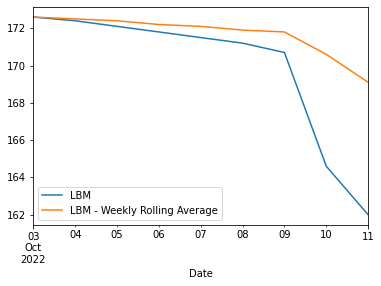

In [203]:
dataframe.plot(x="Date", y=["LBM", "LBM - Weekly Rolling Average"])
plt.show()

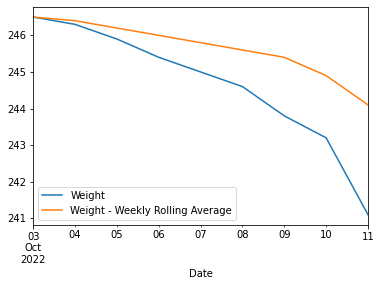

In [204]:
dataframe.plot(x="Date", y=["Weight", "Weight - Weekly Rolling Average"])
plt.show()